In [2]:
# paketlerin çağrılması
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [3]:
# değişkenlerin belirlenmesi
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
# normalizasyon
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5]:
# eğitim ve test setleri
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

In [6]:
# karar ağacının oluşturulması
karar_agaci = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
# Öğrenme süreci
karar_agaci.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
# doğruluk değeri
metrics.accuracy_score(y_train, karar_agaci.predict(X_train))

1.0

In [9]:
# karışıklık matrisi
confusion_matrix(y,karar_agaci.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]], dtype=int64)

In [23]:
!pip install graphviz

In [16]:
from mlxtend.plotting import plot_decision_regions

In [22]:
X = iris.data
y = iris.target
plot_decision_regions(X,y, clf=karar_agaci)

ValueError: Filler values must be provided when X has more than 2 training features.

In [10]:
# model skoru
accuracy_score(y_test,karar_agaci.predict(X_test))

0.9777777777777777

In [24]:
# Karar ağacının çizdirilmesi
tree.export_text(karar_agaci)

'|--- feature_3 <= -0.59\n|   |--- class: 0\n|--- feature_3 >  -0.59\n|   |--- feature_2 <= 0.68\n|   |   |--- feature_3 <= 0.59\n|   |   |   |--- class: 1\n|   |   |--- feature_3 >  0.59\n|   |   |   |--- feature_1 <= 0.10\n|   |   |   |   |--- class: 2\n|   |   |   |--- feature_1 >  0.10\n|   |   |   |   |--- class: 1\n|   |--- feature_2 >  0.68\n|   |   |--- feature_3 <= 0.72\n|   |   |   |--- feature_3 <= 0.59\n|   |   |   |   |--- class: 2\n|   |   |   |--- feature_3 >  0.59\n|   |   |   |   |--- class: 1\n|   |   |--- feature_3 >  0.72\n|   |   |   |--- class: 2\n'

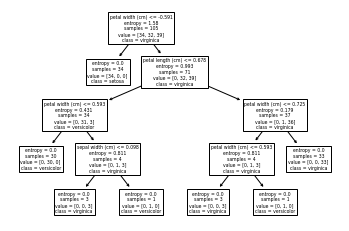

In [25]:
tree.plot_tree(karar_agaci,feature_names=iris.feature_names, class_names=iris.target_names);

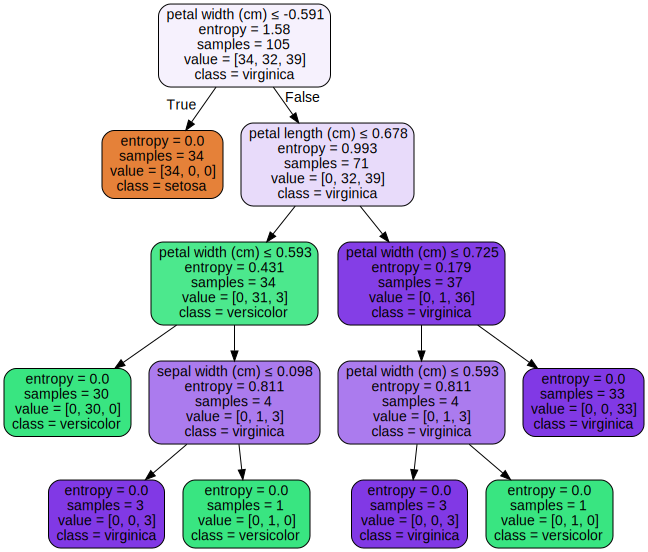

In [37]:
# karar ağaçlarının oluşturulması
import graphviz
dot_data = tree.export_graphviz(karar_agaci,
                                out_file=None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled=True,
                                rounded=True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph.render('iris')
dot_data = tree.export_graphviz(karar_agaci,
                                out_file=None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled=True,
                                rounded=True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

In [34]:
import os
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html

In [36]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'